# 추천 시스템 기초_사전과제
-----
## 1. 추천 시스템이란?
-----
* 추천 시스템: 사용자의 정보 데이터를 분석하여 취향에 맞는 아이템을 추천한느 알고리즘 -> 고객 만족도 증가, 기업 매출 증가 효과

### (1) 사용되는 데이터
1. 명시적 데이터
   * 사용자가 선호도를 직접적으로 입력한 데이터. (평점, 좋아요, 투표 등)
   * 당시 사용자의 취향이 반영됨, but 데이터 자체를 얻기 힘들다
2. 암시적 데이터
   * 사용자의 행동을 기반으로 수집하여 선호도가 간접적으로 표현된 데이터 (조회수, 영상시청 기간, 구매 기록 등)
   * 데이터를 얻기 쉬움, but 취향을 직접적으로 알 수는 없음
         
### (2) 추천 시스템의 분류

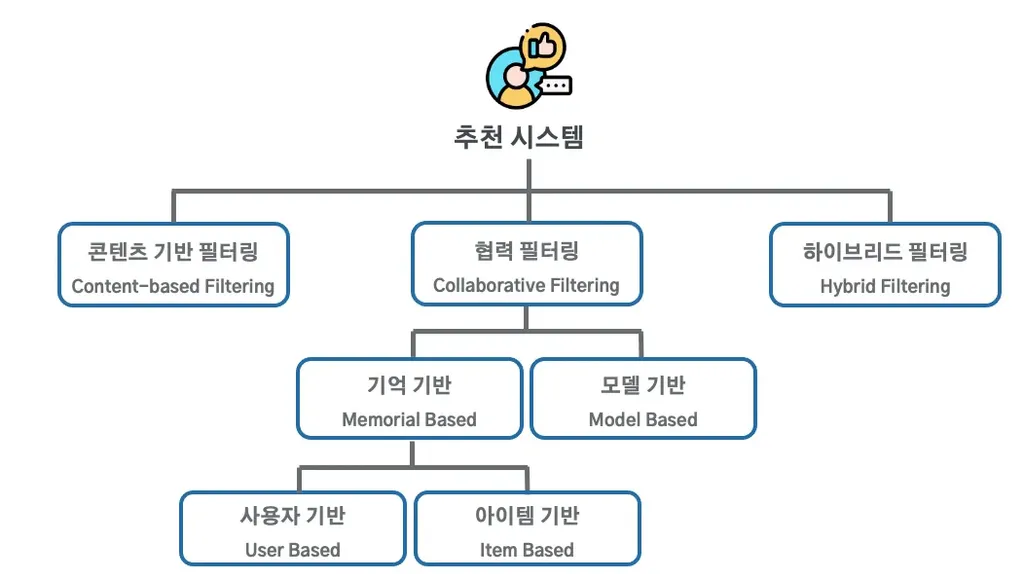

1. 내용 기반 필터링 (Content-based filtering)
   * 콘텐츠의 유사도를 기반으로 사용자에게 추천하는 방법

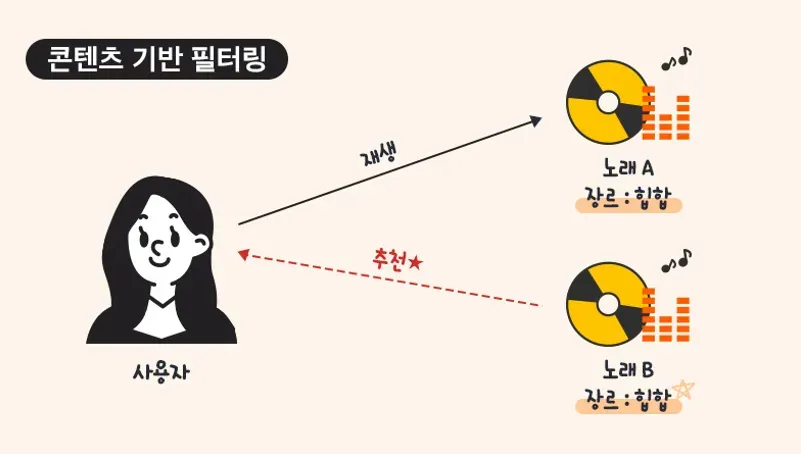

2. 협업 필터링 (Collaborative Filtering)
   * 다수의 사용자로부터 얻은 선호도 정보를 기반으로 사용자에게 추천하는 방법
   * 비슷한 관심사를 가지고 있는 두 사람이 있을 때, 한 사용자의 데이터를 바탕으로 다른 사용자에게 추천해주는 방식.          
  
        (1) 사용자 기반(User-Based Filtering): 특정 사용자와 유사한 취향의 사용자가 선호한 아이템 추천.            
          + ex. A와 B 비슷한 음악 들음 -> A가 듣는거 B에게도 추천함           
            
        (2) 아이템 기반: 사용자가 선호한 아이템과 유사한 아이템 추천           
          + ex. A가 백예린 들음 -> 백예린 듣는 다른 사람들은 보통 발룬티어스도 들음 -> 백예린이랑 발룬티어스는 유사한 아이템이구나 판단 -> A에게 발룬티어스 추천

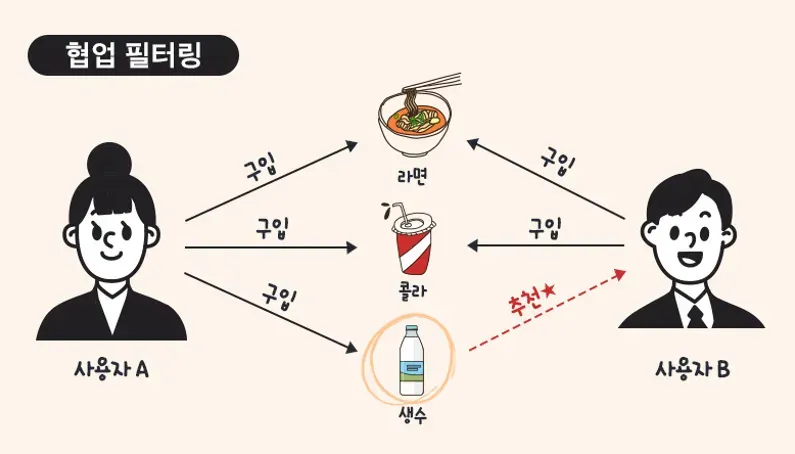

3. 하이브리드 필터링 (Hybid Filtering)
   * 2가지 이상의 추천 시스템 알고리즘 조합하여 각각의 단점 보완함.

## 2. 내용 기반 필터링; 자세히 알아보기
-----
* **사용자 프로필**과 **아이템 특징**과의 일치도(유사도)를 계산 -> 사용자가 선호할 만한 아이템을 추천해주는 알고리즘.
  + 사용자 프로필: 사용자가 이전에 좋아했던 항목들의 특징을 모아놓은 데이터. ex)인디음악 선호
  + Input: 사용자의 Item들에 대한 등급/ Output: 사용자의 등급 매기는 행위에 맞는 classifier 생성

### (1) 유사도; 획득 방식
1. 영상, 이미지, 텍스트 형태의 아이템 정보 데이터를 **벡터화** 한다          
   + 인풋 데이터 만들기: 아이템 정보를 피처 추출해 데이터 테이블로 만들고 원-핫 인코딩
   + 유저와 아이템을 동일한 기준의 피처로 표현해 벡터 계산 가능하게 함
2. 아이템 벡터간의 유사도를 측정한다; 유저 벡터와 아이템 벡터를 내적해 값이 큰 것이 유사도가 높은 것.
3. 이를 바탕으로 고객이 선호하는 아이템과 비교하여 유사도가 높은 아이템을 선별

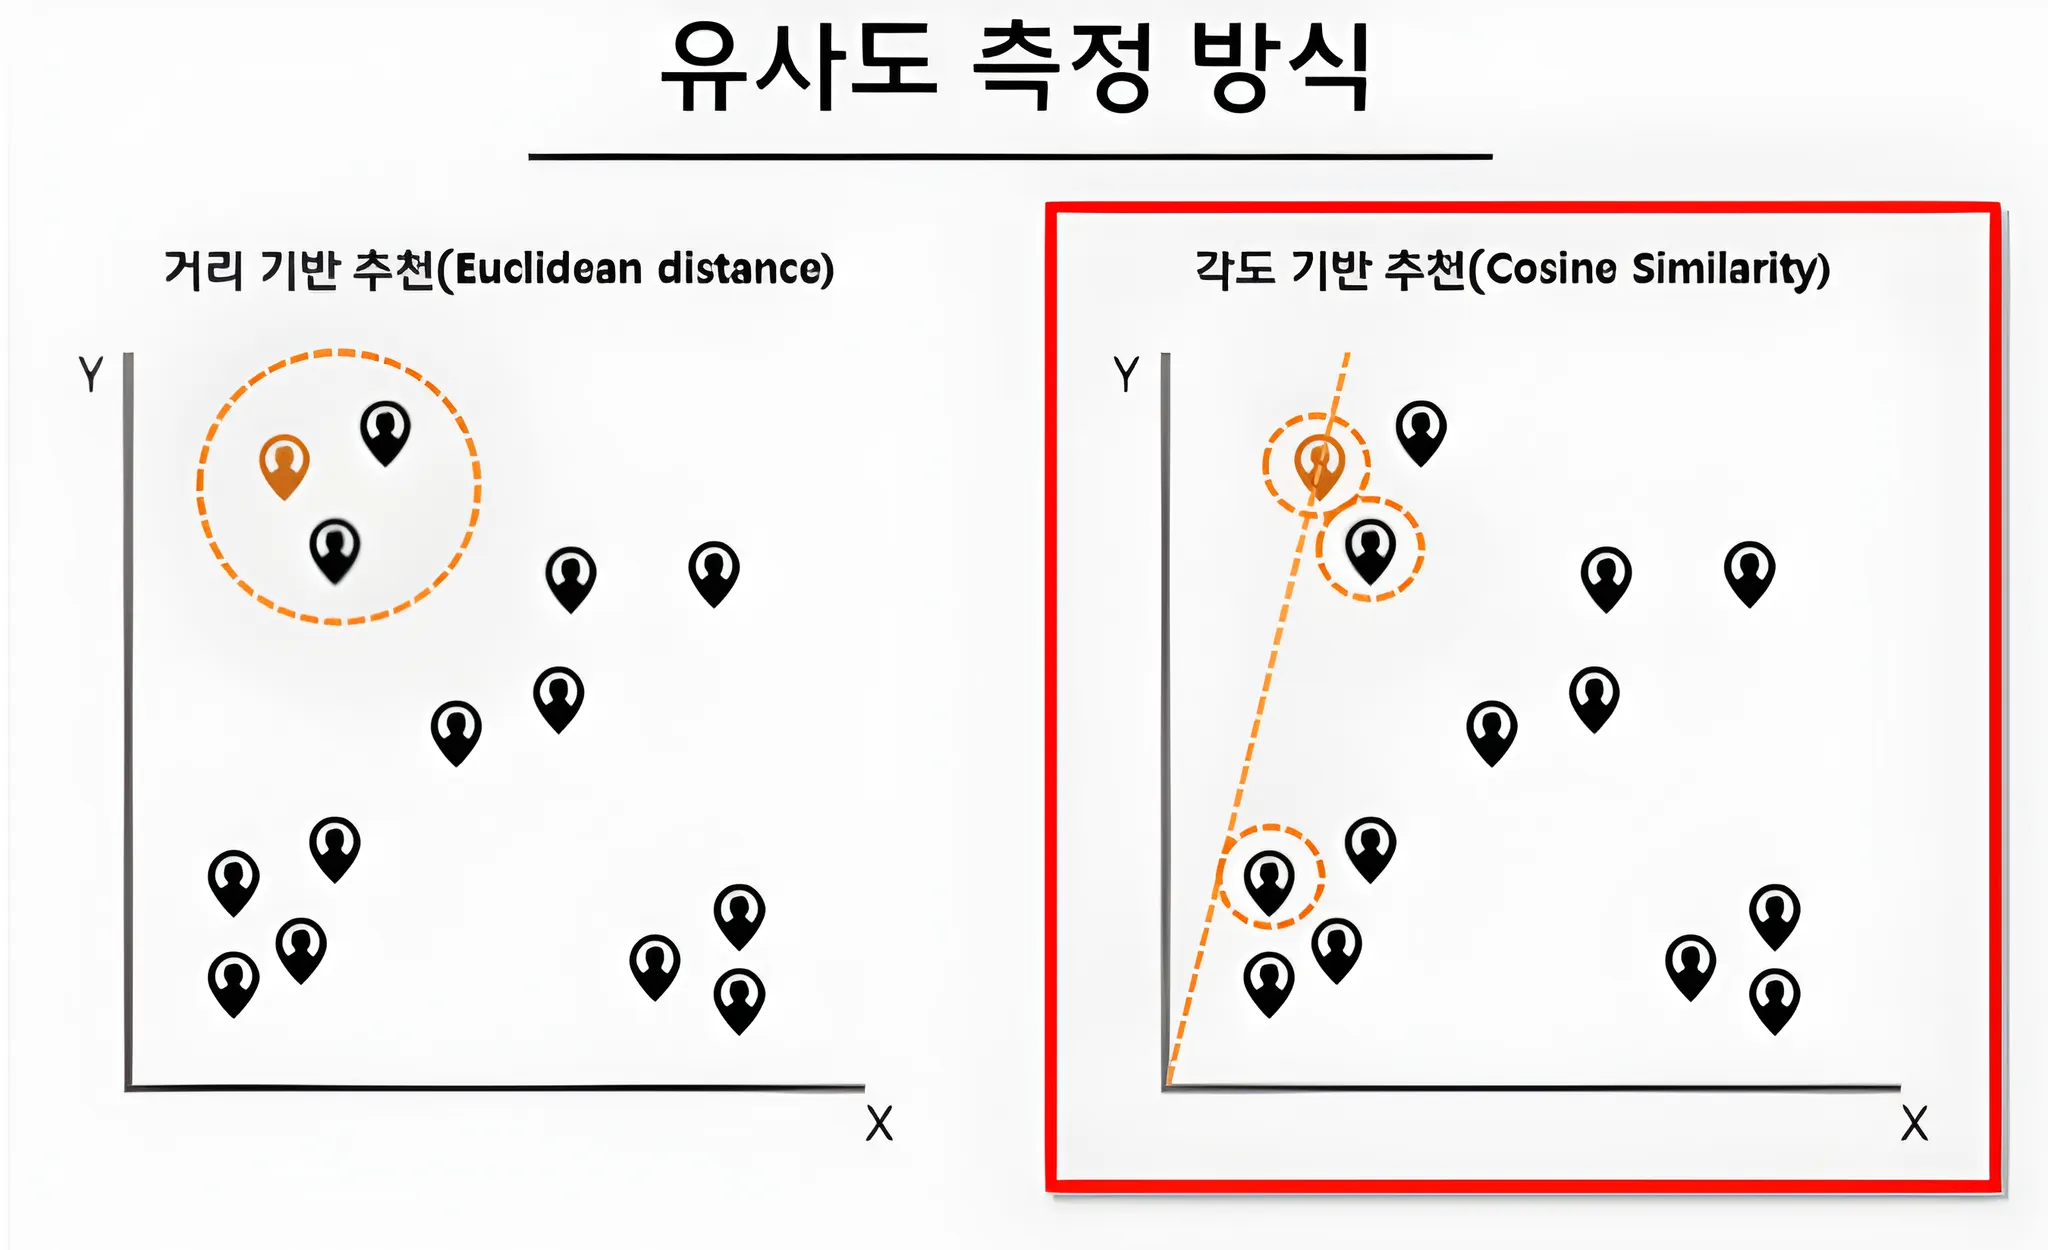

> * 코사인 유사도: 두 점 사이 각도 측정한 지표, 값이 작을수록 유사함
> * 유클리드 거리: 두 점 사이 거리 측정한 지표, 값이 작을수록 유사함

### (2) 사용자 프로필; 획득 방식
1. 특성 가중치: 사용자가 가지고 있는 아이템 특성 가중치의 평균값 활용
2. 사용자의 기호 파악하여 프로필 획득
3. 아이템에 대한 유저의 기존 평가를 바탕으로 분류 문제 해결

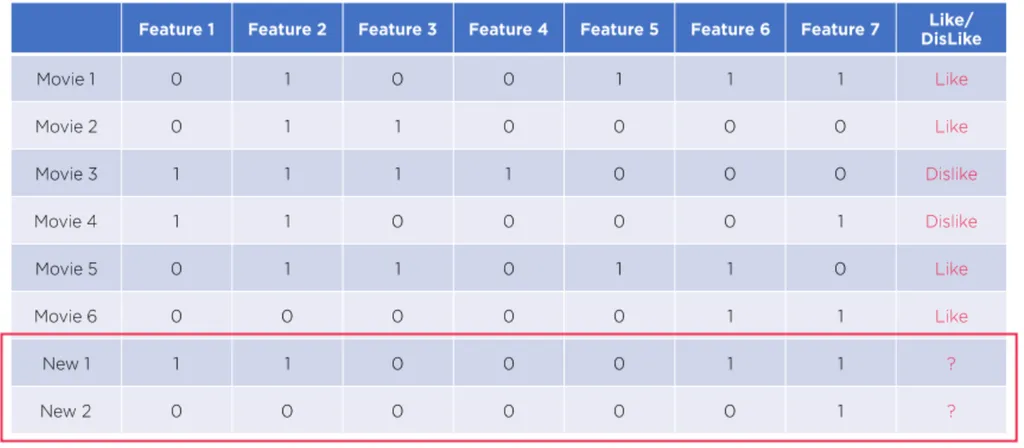

> 좋은 사용자 프로필을 구성할 수록, 추천시스템의 정확도와 만족도 높아짐. (다양한 방식 혼합하여 사용함)

### (3) 아이템 특징
* 아이템을 벡터 형태로 표현하며, 도메인에 따라 다른 방법이 적용됨
* 컨텐츠의 내용을 분석하는 아이템 분석 알고리즘: 클러스터링, 머신러닝, TF-IDF

#### TF-IDF (Term Frequency- Inverse Document Frequency)
* TF(단어 빈도; 특정 문서에 특정 단어의 출현 빈도)와 IDF(역문서 빈도;전체 문서에 특정 단어의 출현 빈도) 통해서 **다른 문서에는 등장하지 않지만 특정 문서에서만 자주 등장하는 단어** 찾아서 **문서 내 단어의 가중치** 계산하는 방법
* $TF(d,t)$ : 특정 문서 d 에서 특정 단어 t 의 등장 횟수
* $DF(t)$ : 특정 단어 t가 등장한 문서의 수
* $IDF(d,t)=\log{\frac{n}{1+df(t)}}$
* $TF-IDF=TF(d,t)*IDF(d,t)$
* 즉 특정 단어가 특정 문서에만 들어있을 수록 IDF 증가 -> 더 중요한 단어로 인식.

### (4) 장단점
* 장점
  + 아이템에 대한 콜드 스타트 문제(정보 수집이 충분하지 않아 추천 불가능) 해결 가능
  + 아이템의 피처를 통해 추천하므로 이유 설명 가능
* 단점
  + 아이템의 정확한 피처 추출 못하면 정확도 감소
  + 기존 아이템과 유사한 아이템 위주로만 추천해, 새로운 장르의 아이템 추천 어려움

## 3. 협업 필터링; 자세히 알아보기
-----
* 기존 사용자들과 아이템의 상관관계를 기반으로, 새로운 사용자와 아이템의 상관관계를 예측하는 것.

### (1) 메모리 기반 협업 필터링 (Memory-Based Collaborative Filtering)
* 이웃 기반 협업 필터링.
* 사용자 또는 아이템 간 유사도를 기반으로 한다
* 두 가지 형태의 접근법 존재
  + 사용자 기반(User-Based, UBCF)
    - 유저 간의 유사도가 높을수록 높은 가중치
    - 아이템 수 > 사용자 수 일때 적합
    - 아이템이 수시로 바뀌는 경우 적합
    - IBCF보다 추천 범위 다양
  + 아이템 기반(Item-Based; IBCF)
    - 아이템간의 유사도가 높을수록 높은 가중치
    - 사용자 수 > 아이템 수 일때 적합
    - 아이템 리스트 변화가 적고 고정적인 경우 적합
    - 계산이 빨라서 사용자 유입이 많은 환경에서 유리, but 참신성 부족          

* 한계
  + 아이템/ 유저가 계속 늘어날수록 확장성 감소 (Scalability)
  + 주어진 평점/ 선호도 데이터가 적을 경우 성능 저하 (Sparsity)
  + 실제로 유저-아이템 행렬 대부분의 원소는 비어있는데, 비어있는 비율이 99.5%가 넘으면 model-CF 이용하자!
  + 유저가 많아서 아이템과 유저의 유사도를 구하기 어렵다면 KNN CF 이용하자!    
                
### (2) 모델 기반 협업 필터링 (Model-Based Collaborative Filtering)
* 머신러닝 모델을 통해 관측 데이터로부터 **잠재 선호 요인**을 수치적으로 학습 후, 벡터(행렬) 계산을 통해 평점 예측
* 잠재요인 (Latent Factor): 사용자와 아이템 간의 관계를 설명해주는, 눈에 보이지 않는 숨겨진 요인.

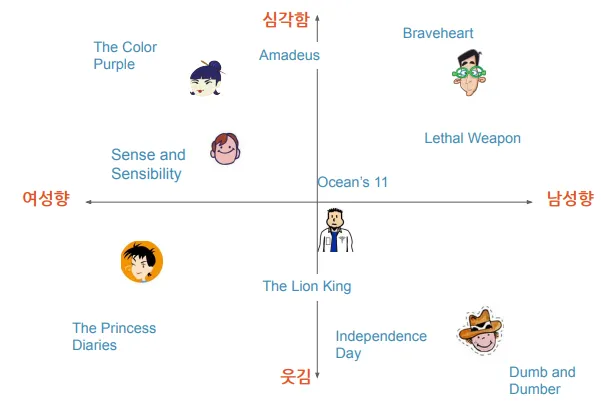

> Factor Model. 아이템, 유저의 구분 없이 정해진 축(차원)으로 하나의 좌표 벡터로 표현

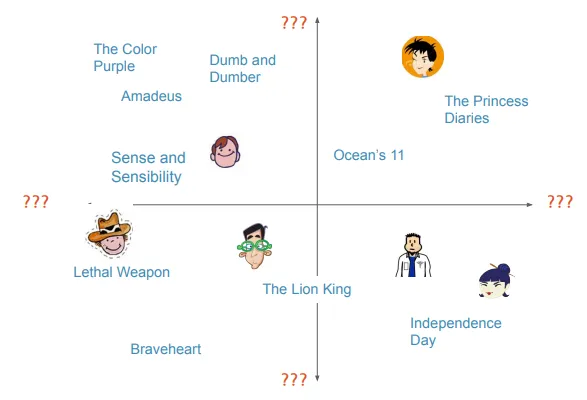

> Latent Factor Model. 잠재적 특성을 파악하기 때문에 축이 무엇인지, 몇개인지도 모름. 각 벡터를 명시적으로 이해는 불가하지만, 각 좌표벡터간의 거리, 각도는 계산 가능해서 유사도 파악 가능.

* 행렬 분해(Matrix Fatorization): User-Item Matrix를 분해하여 유저의 잠재요인과 아이템의 잠재요인의 내적으로 설명 -> 평점 예측 가능

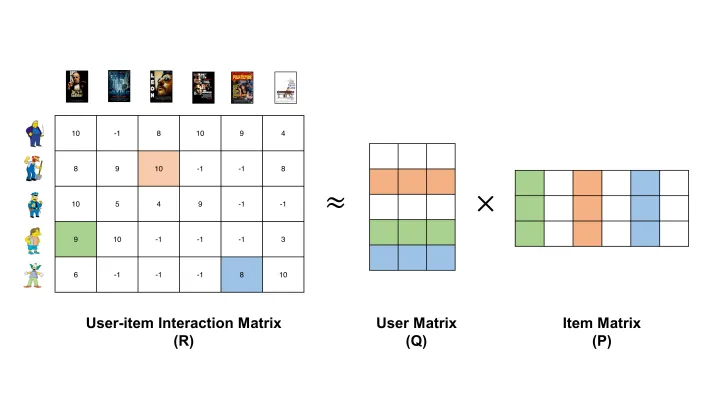

> * $R\approx QP^T$
> * R=User-Item Rating Metrix, Q: 유저 잠재요인 행렬, P: 아이템 잠재요인 행렬

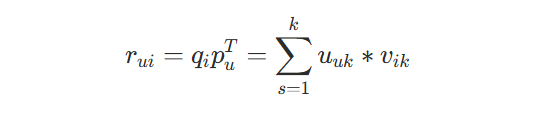

> * User u의 item i에 대한 선호도가 유저-아이템 잠재요인 행렬 벡터의 내적으로 표현된 모습
> * p,q는 각각 P,Q 행렬의 벡터
> * r: 유저 u의 아이템 i 선호도 추정값

## 4. 추천 시스템 평가
-----
1. 오프라인 평가 (실시간 연동X)
   * 사용자 과거의 로그를 사용해 모델의 예측 정밀도 평가
   * 과거 사용자 행동 학습 -> 미래 사용자 행동 예측
2. 온라인 평가 (실시간 연동 O)
   * 추천 모델이나 새로운 사용자 인터페이스를 일부 사용자에게 실제로 표시하여 평가 수행
3. 사용자 스터디
   * 사용자에게 직접 인터뷰, 설문

## 5. 최근 연구 동향
-----
* 자연어 처리 기술에 기반한 추천 시스템 연구가 이루어지고 있다.